# GARCH Model Suitability Analysis

This notebook evaluates whether selected stocks are suitable for modeling with GARCH models. 

To determine suitability, we analyze the autocorrelation structure of the returns and their squared values:
- The autocorrelation function (ACF) of the returns should ideally be close to zero, indicating no linear dependencies.
- The ACF of the squared returns should exhibit significant correlations, suggesting the presence of volatility clustering.

These characteristics are essential for GARCH models to effectively capture and forecast volatility dynamics.

In [40]:
# Import required libraries
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

from src.models.garch import garch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Initializing the GARCH Model

The GARCH model is initialized for a specific stock and time period. This step involves setting up the model with the necessary parameters and preparing it for data analysis. The selected stock and time period are critical for ensuring the model captures the relevant volatility patterns.

In [41]:
# Define the industrial stocks for analysis
industrials_stocks = ["BA", "CHRW", "DOV", "EFX", "EMR", "FAST", "ITW", "NOC", "UPS", "WM"]

# Time period for analysis
start_date = "2009-01-01"
end_date = "2019-01-01"

print(f"Analyzing {len(industrials_stocks)} industrial stocks:")
print(", ".join(industrials_stocks))
print(f"\nTime period: {start_date} to {end_date}")

Analyzing 10 industrial stocks:
BA, CHRW, DOV, EFX, EMR, FAST, ITW, NOC, UPS, WM

Time period: 2009-01-01 to 2019-01-01


## Data Preparation for GARCH Analysis

The data preparation step involves loading and preprocessing the stock returns data. This includes ensuring the data is clean, properly formatted, and ready for analysis. Accurate data preparation is crucial for reliable GARCH model estimation and forecasting.

## Individual Stock Analysis

Let's start by analyzing a single stock in detail to understand the GARCH effects.

In [42]:
# Analyze a sample stock (NOC - Northrop Grumman) in detail
sample_stock = "NOC"
start_date = "2009-01-01"
end_date = "2012-05-02"

print(f"Detailed analysis for {sample_stock}:")

# Create GARCH model instance
sample_garch = garch(sample_stock, start_date=start_date, end_date=end_date)
sample_garch.read_data()

# Display basic statistics
print(f"\nData shape: {sample_garch.data_prep.data.shape}")
print(f"Date range: {sample_garch.data_prep.data.index[0]} to {sample_garch.data_prep.data.index[-1]}")
print(f"\nFirst few rows:")
print(sample_garch.data_prep.data.head())

Detailed analysis for NOC:

Data shape: (839, 5)
Date range: 2009-01-02 00:00:00 to 2012-05-01 00:00:00

First few rows:
Price           Close       High        Low       Open   Volume
Ticker            NOC        NOC        NOC        NOC      NOC
Date                                                           
2009-01-02  29.514652  29.653991  28.412603  28.950960  1385944
2009-01-05  31.224726  31.357732  29.685658  29.685658  3595905
2009-01-06  30.711704  31.585743  30.407690  31.452737  3004095
2009-01-07  29.869331  30.509028  29.489315  30.509028  2210515
2009-01-08  30.559711  30.597714  29.482996  29.704672  2360376


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


In [43]:
# Run stationarity tests
print(f"\n=== Stationarity Tests for {sample_stock} ===")
stationarity_result = sample_garch.stationarity_test()
print(stationarity_result)

# Fit the GARCH model
sample_garch.garch()


=== Stationarity Tests for NOC ===
  ticker  adf_statistic   p_value
0    NOC      -5.394461  0.000003


In [44]:
# Run autocorrelation tests
print(f"\n=== Autocorrelation Tests for {sample_stock} ===")
acf_result = sample_garch.acf_test()
print(acf_result)


=== Autocorrelation Tests for NOC ===
  ticker  ljung_box_stat_daily  p_value_daily  ljung_box_stat_abs  \
0    NOC              36.94094       0.178872          514.180559   

    p_value_abs  
0  1.486337e-89  


In [45]:
# Calculate kurtosis
sample_garch.kurtosis()

Kurtosis of NOC: 2.281727269870389


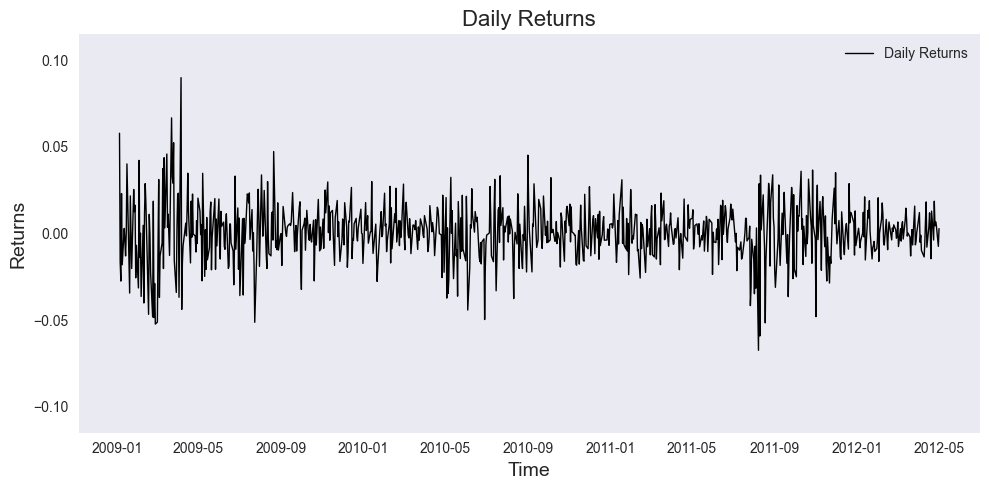

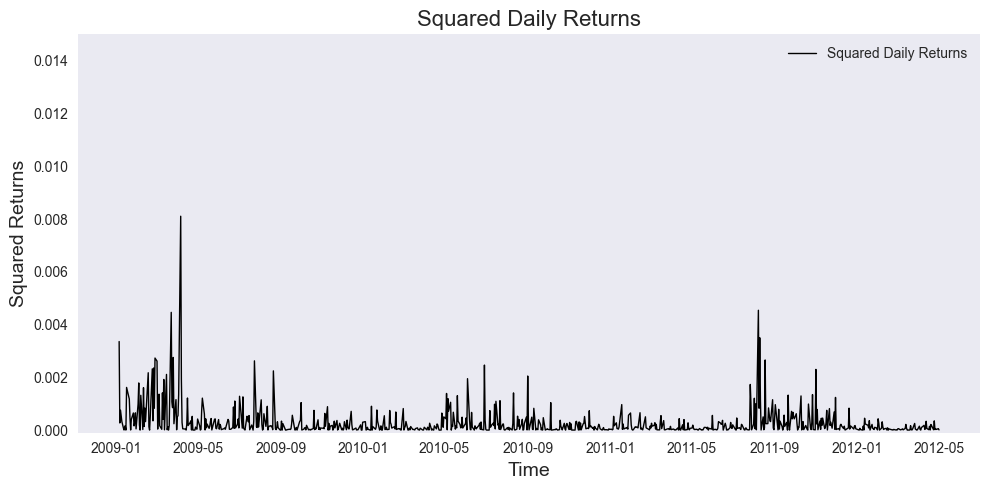

In [46]:
# Generate stationarity plots
sample_garch.stationarity()

## Visualizing GARCH Model Results

Visualization is a key step in understanding the performance and behavior of the GARCH model. By plotting the model's outputs, such as predicted volatility and residuals, we can assess its ability to capture the underlying dynamics of the stock returns. These visualizations also help identify any potential issues or areas for improvement in the model.

## Comprehensive Analysis Across All Stocks

Now let's run the analysis across all industrial stocks to get a comprehensive view of GARCH effects.

Running comprehensive GARCH analysis across all industrial stocks...
[1/10] Processing BA
Kurtosis of BA: 1.6490844271958887


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


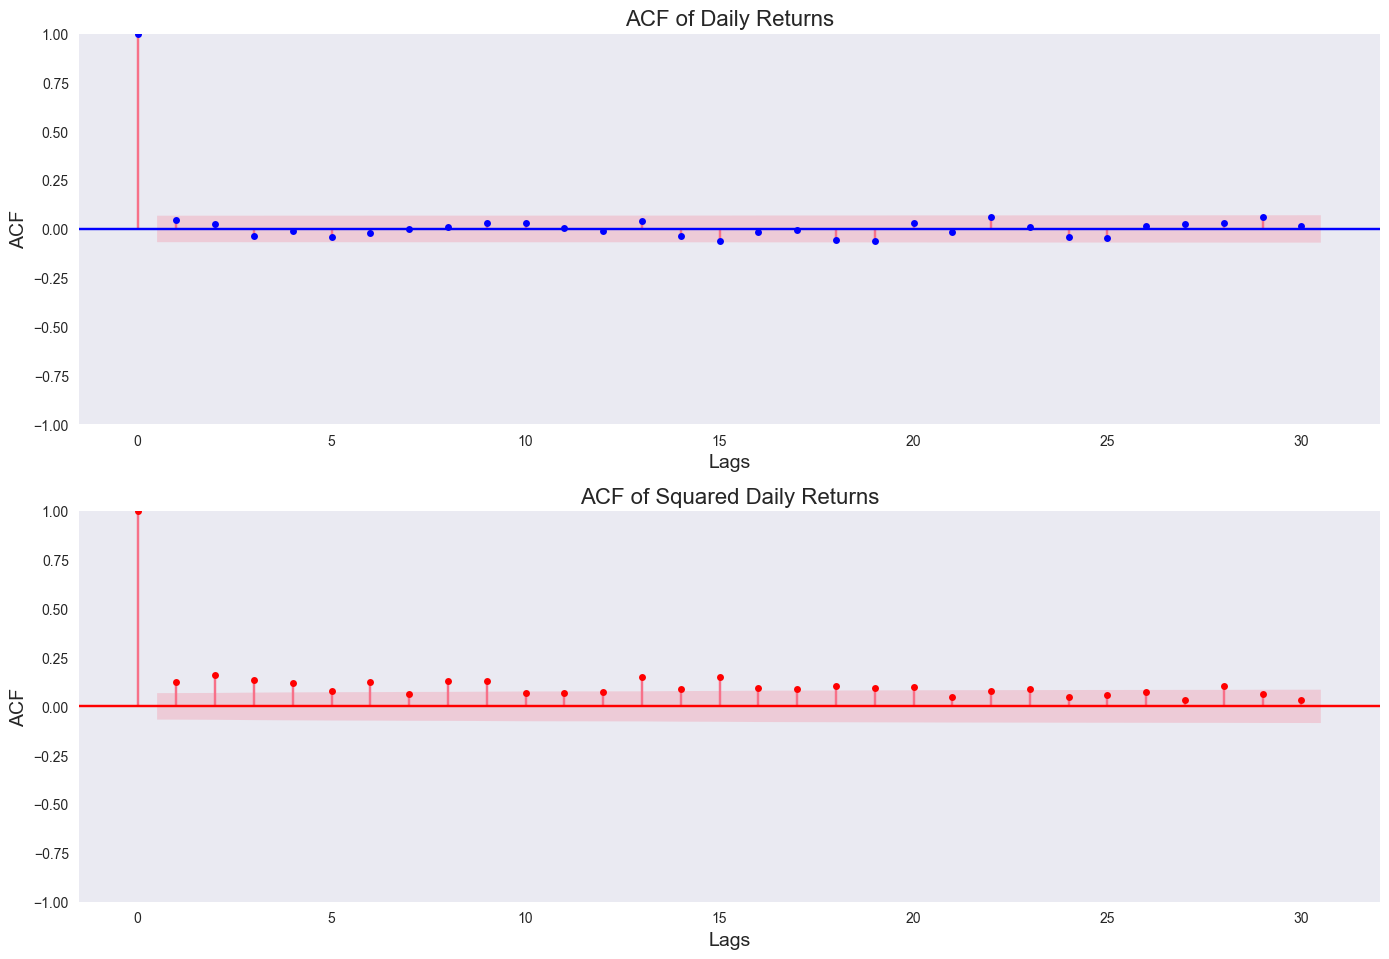

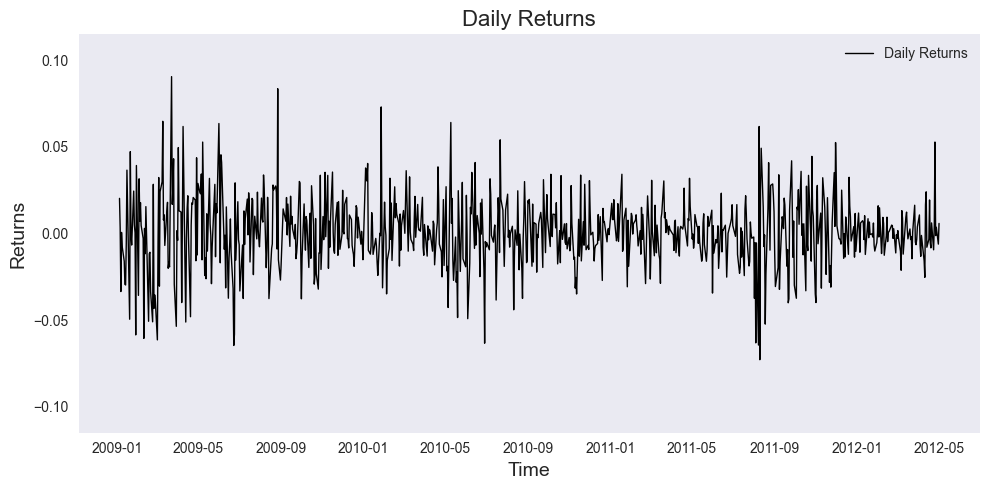

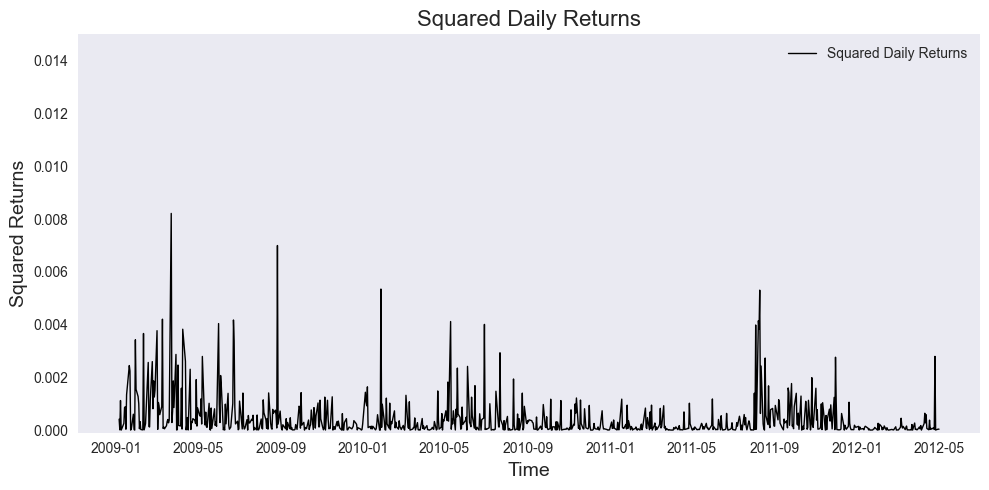

[2/10] Processing CHRW
Kurtosis of CHRW: 3.456322251864525


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


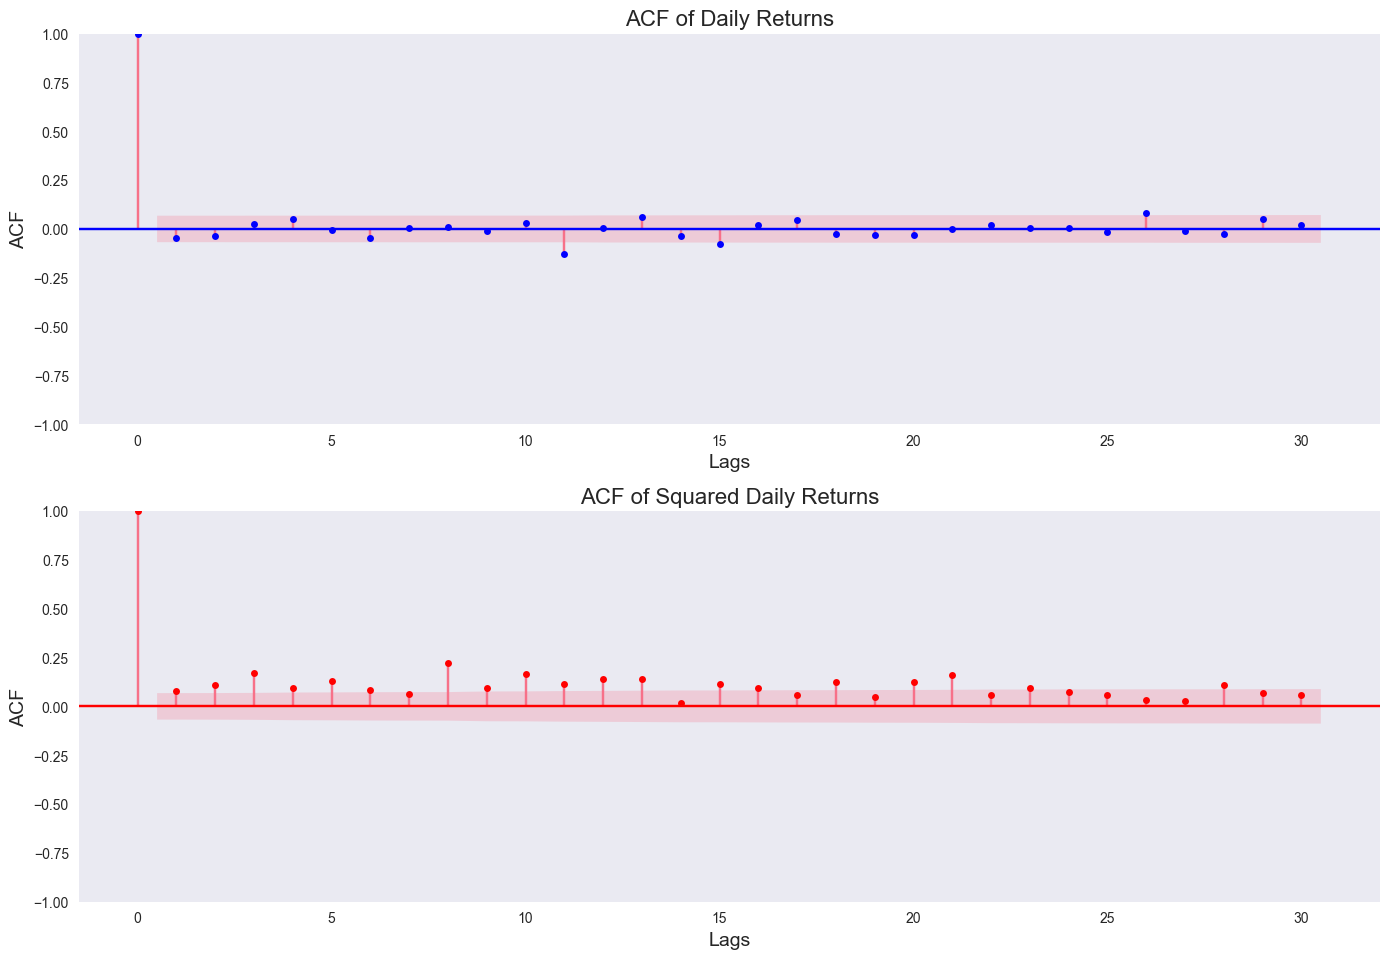

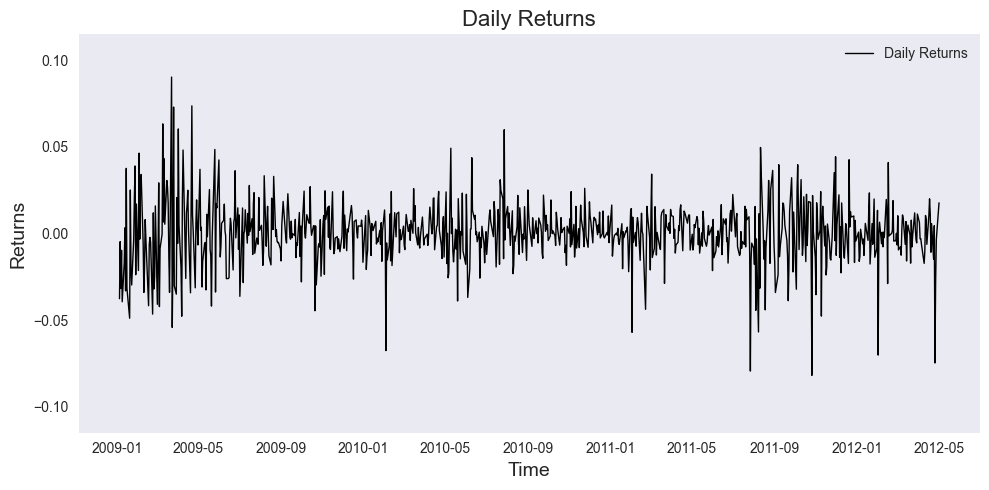

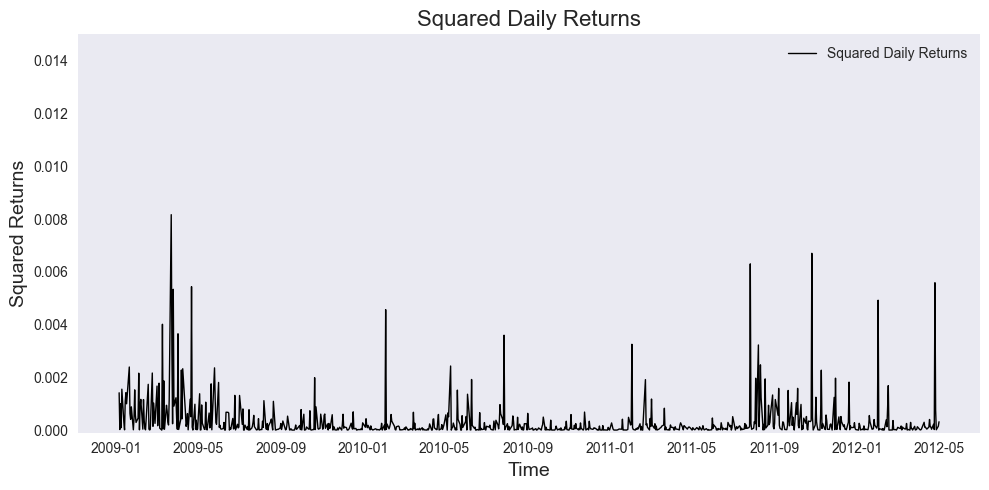

[3/10] Processing DOV
Kurtosis of DOV: 1.7928444983785239


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


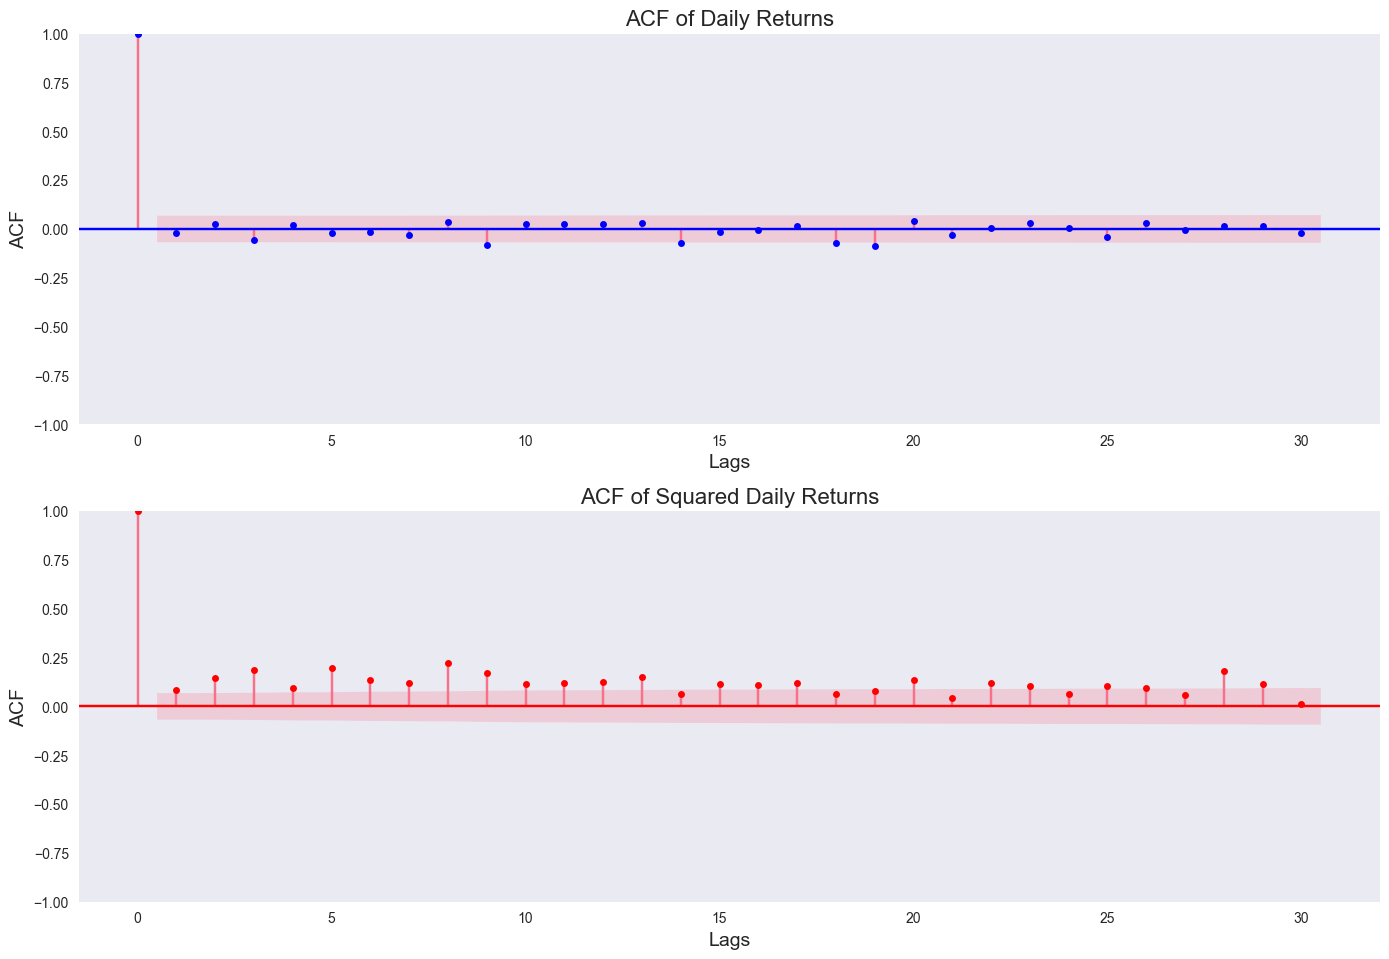

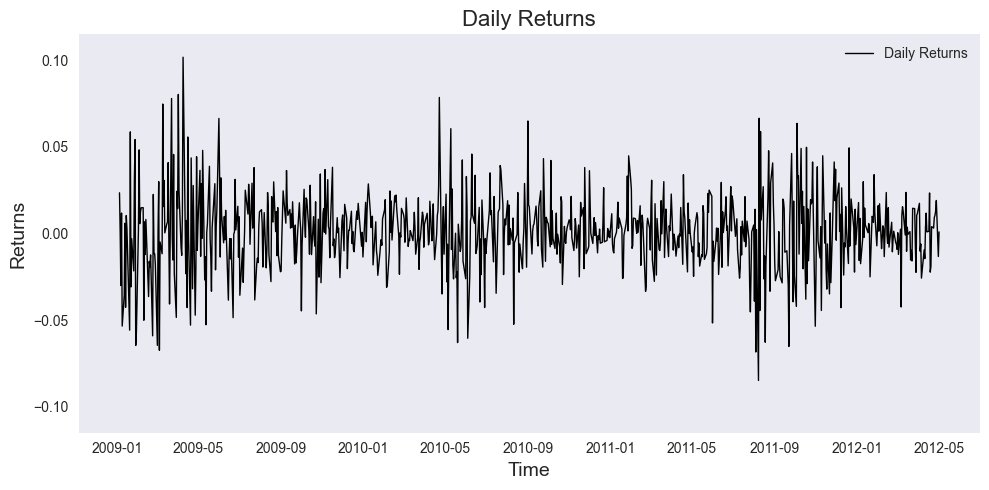

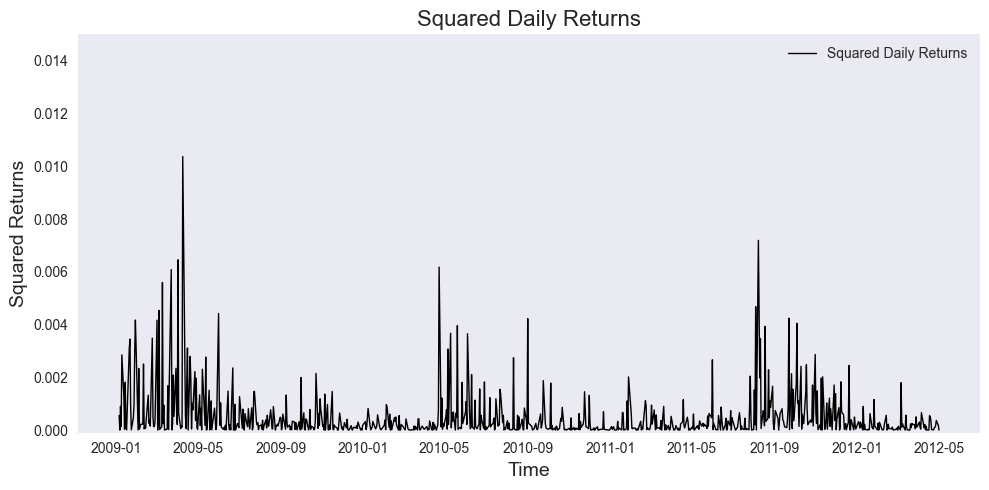

[4/10] Processing EFX
Kurtosis of EFX: 2.449545801235306


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


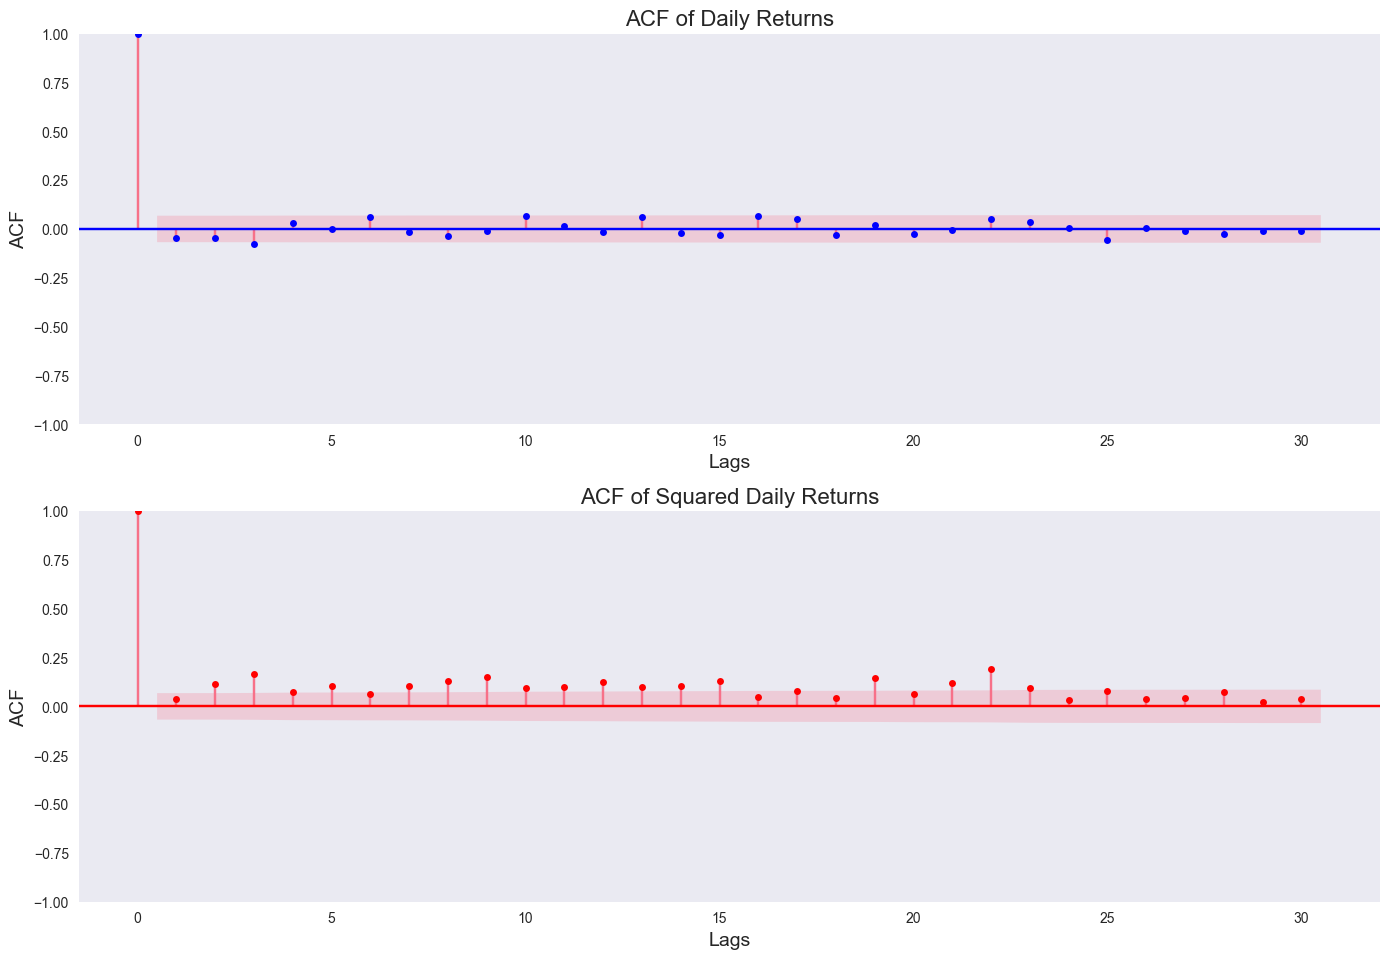

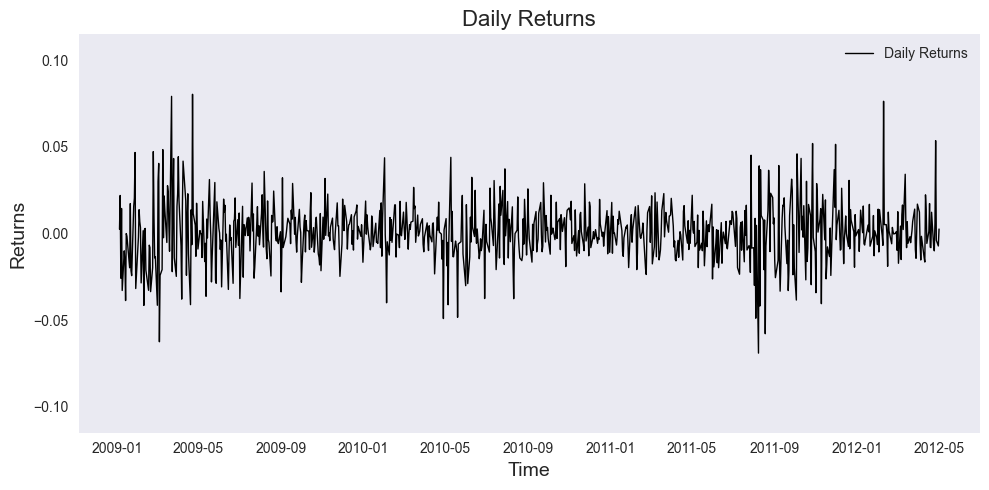

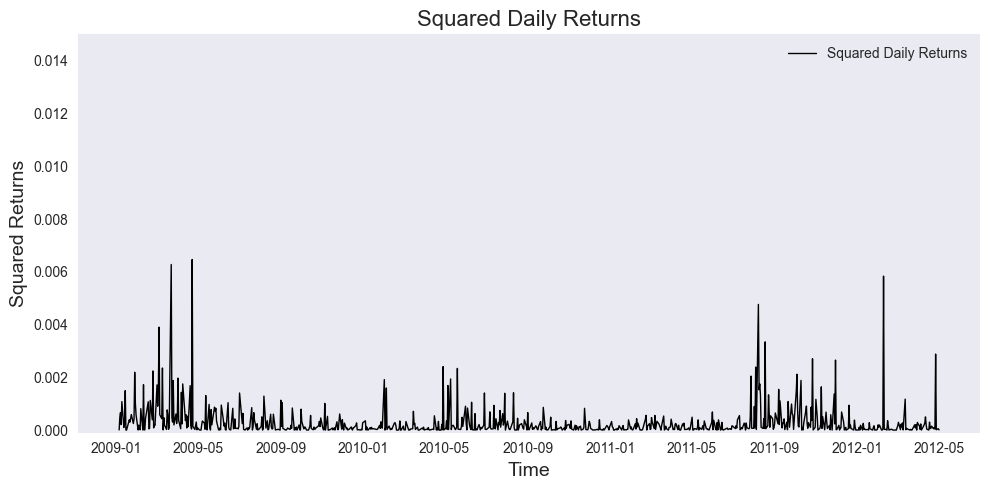

[5/10] Processing EMR
Kurtosis of EMR: 2.378834638337427


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


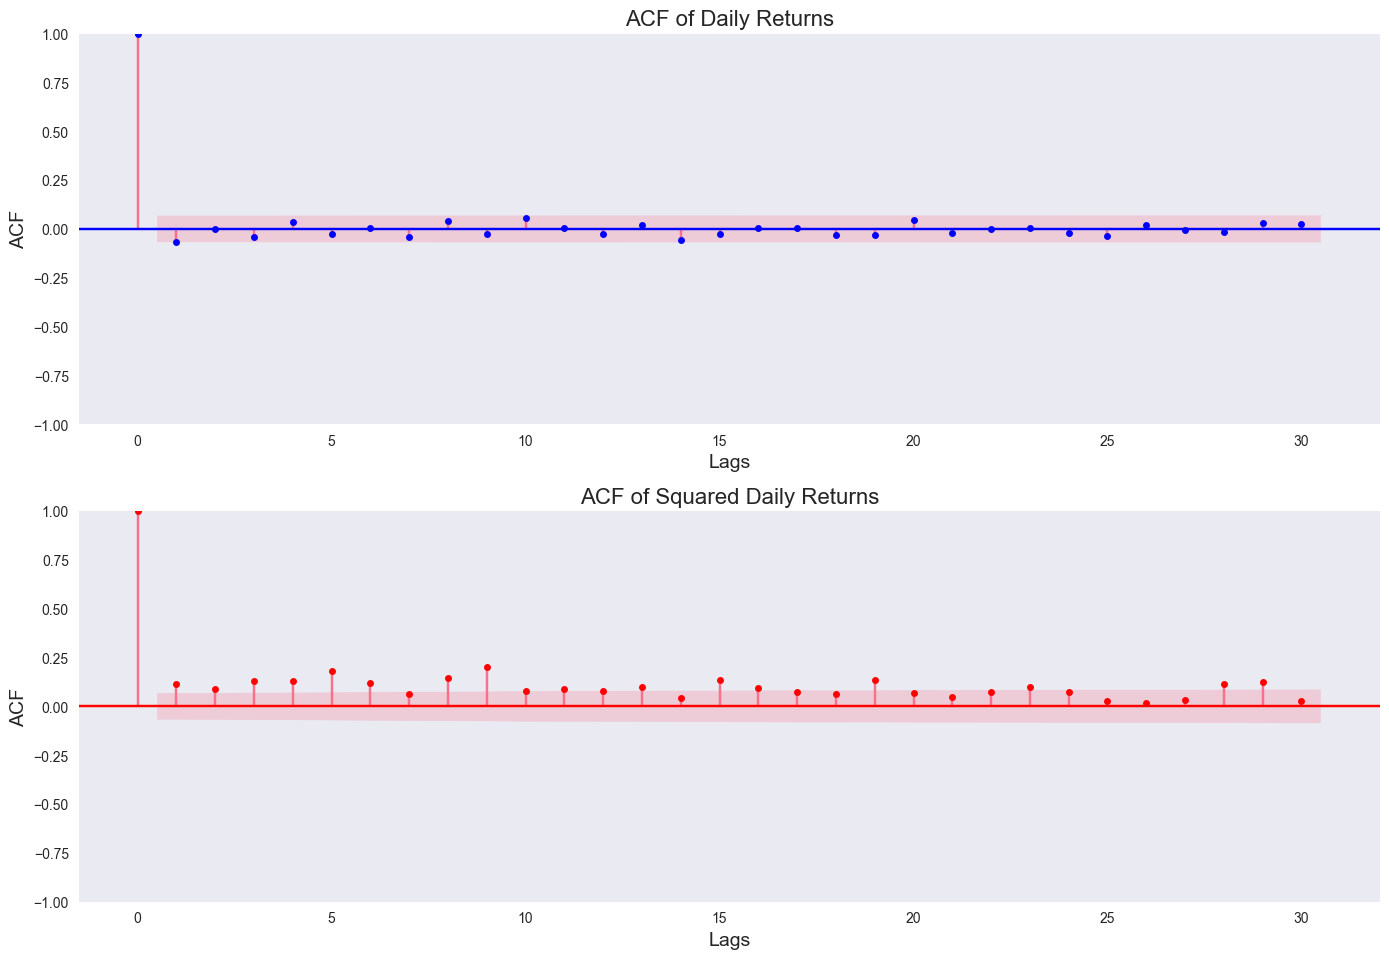

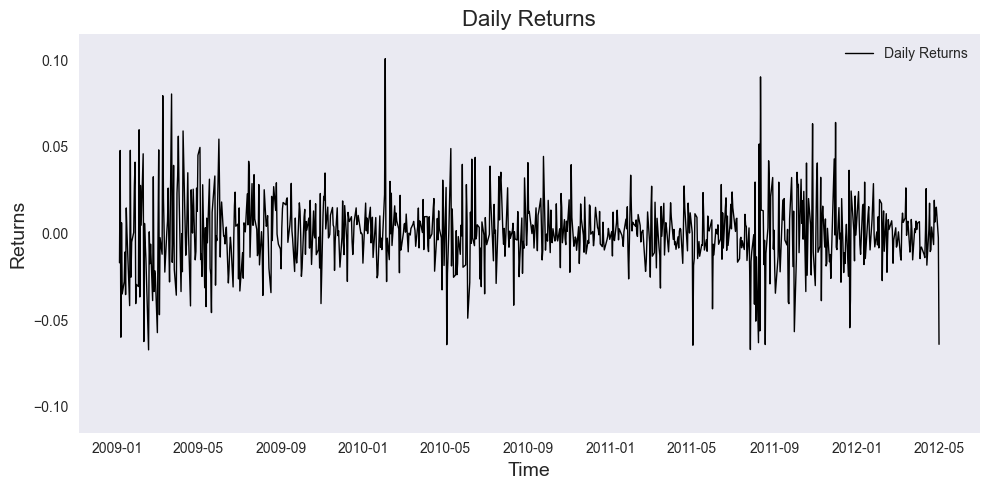

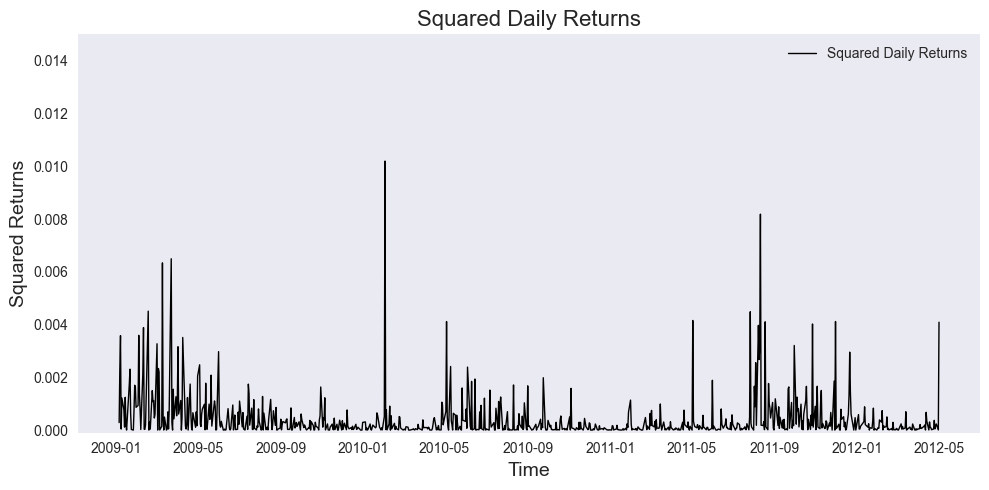

[6/10] Processing FAST
Kurtosis of FAST: 2.247691424445568


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


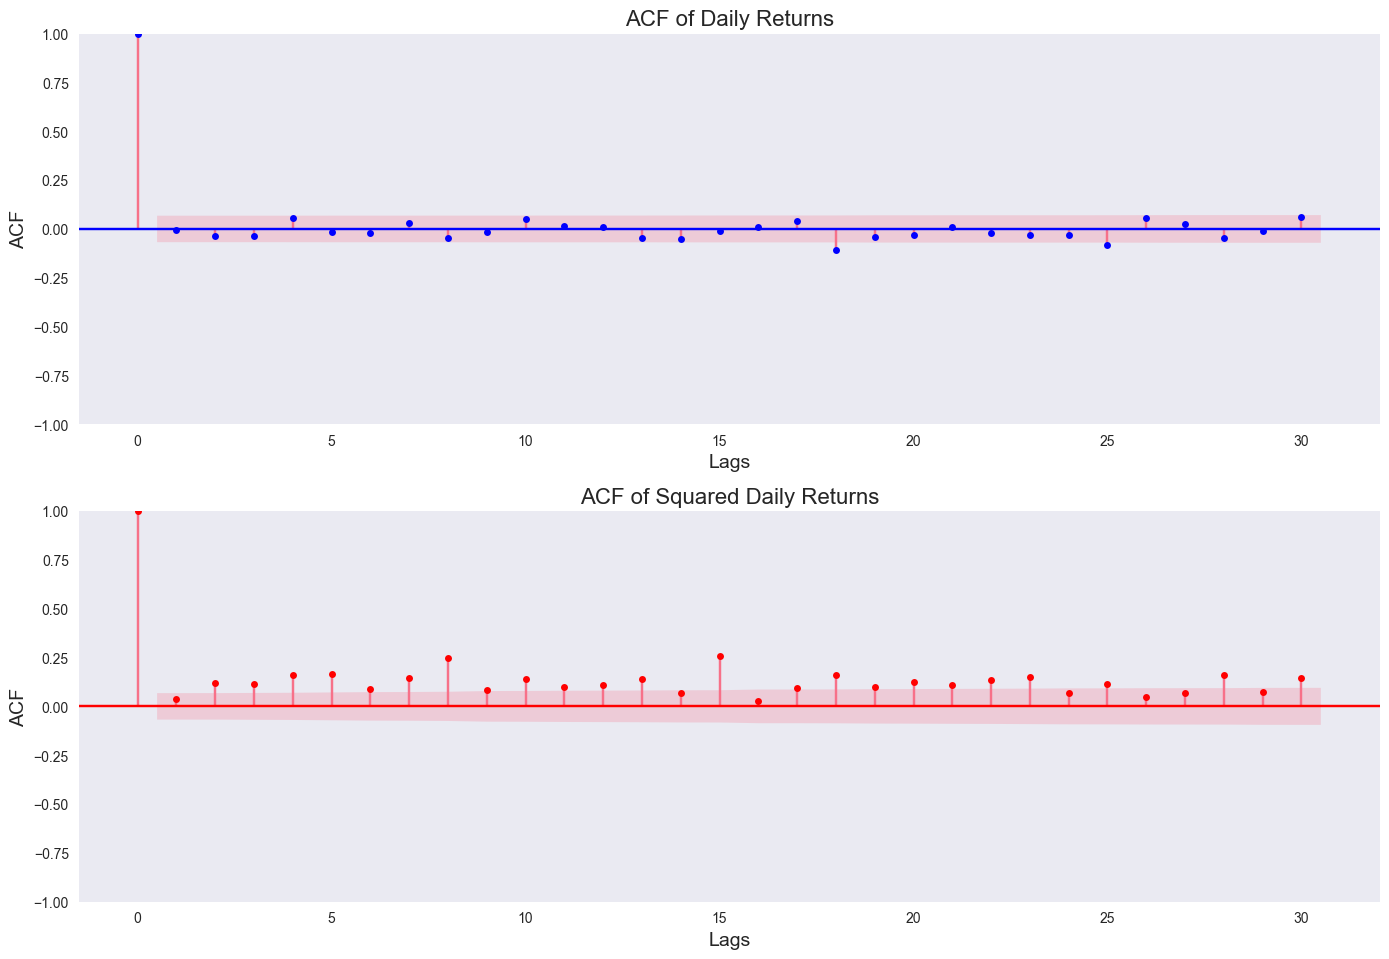

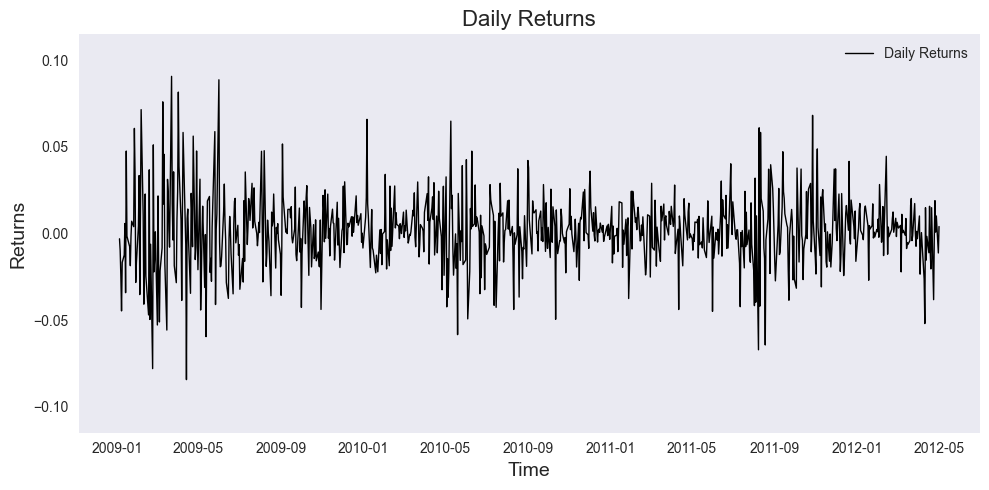

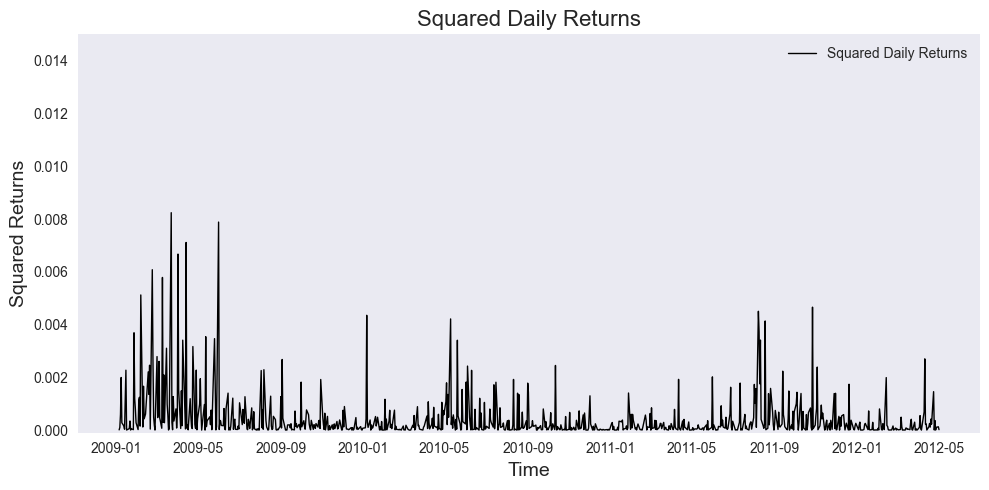

[7/10] Processing ITW
Kurtosis of ITW: 2.71750179490199


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


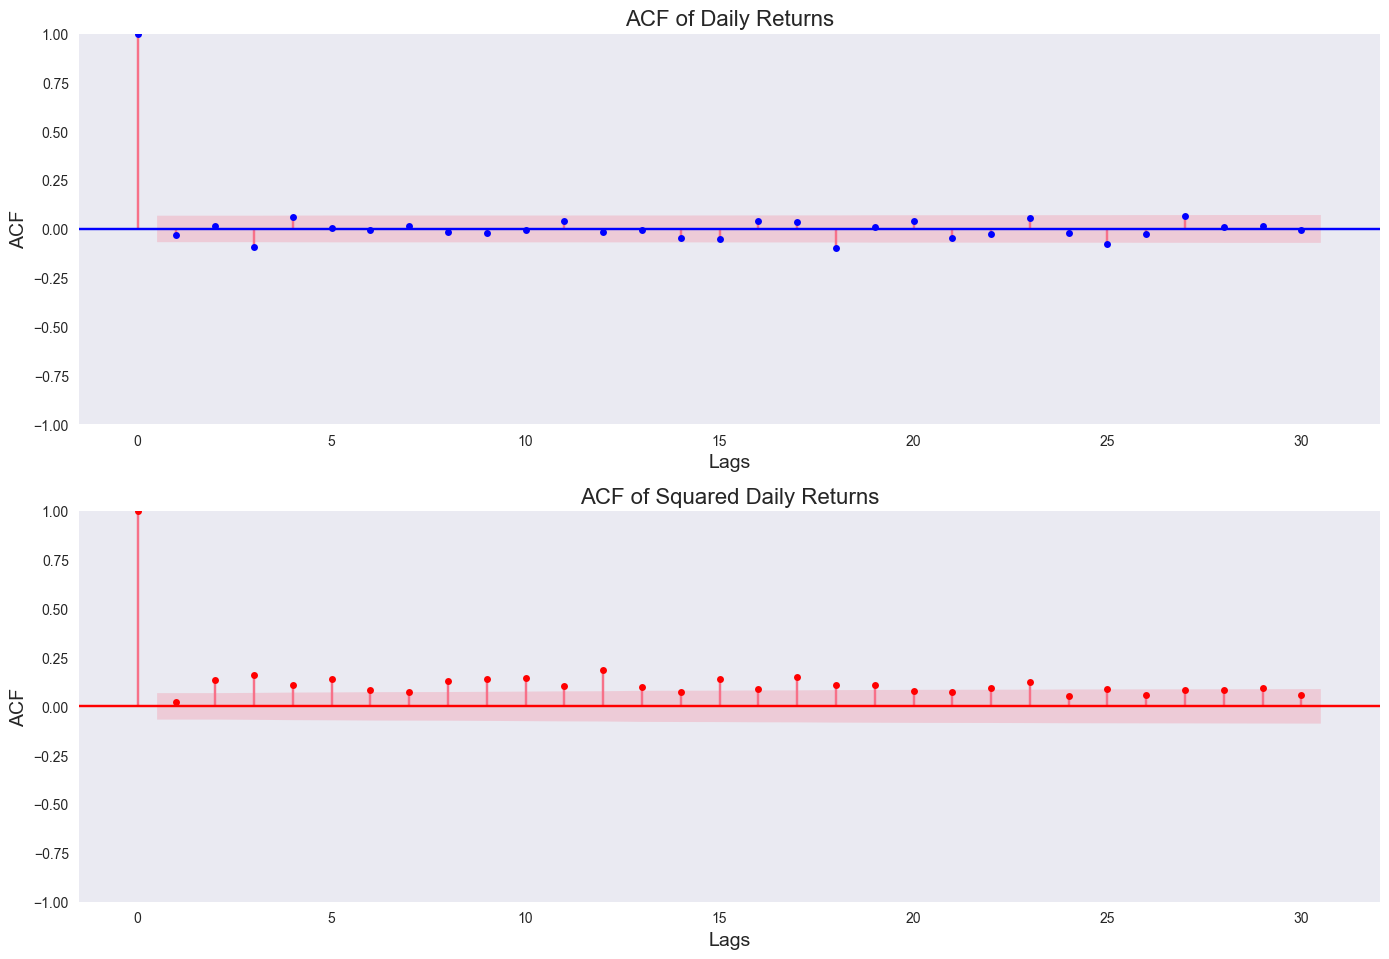

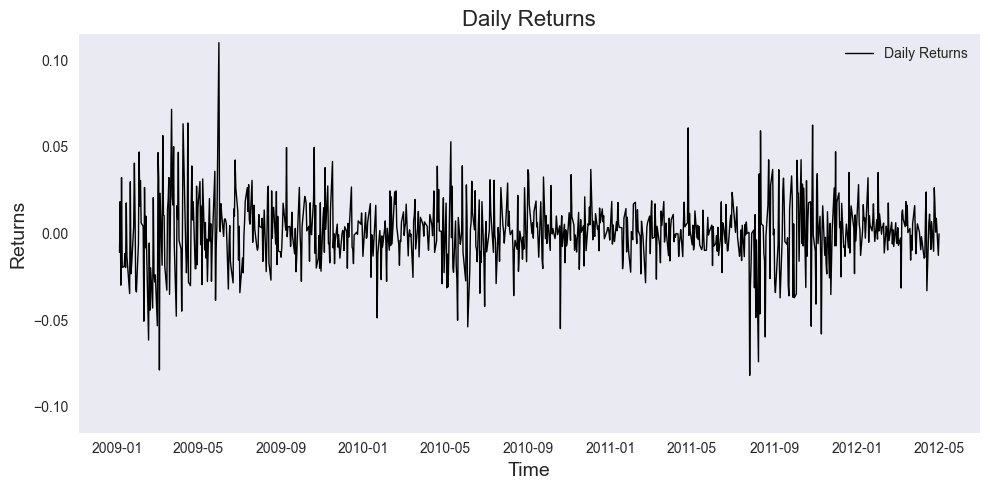

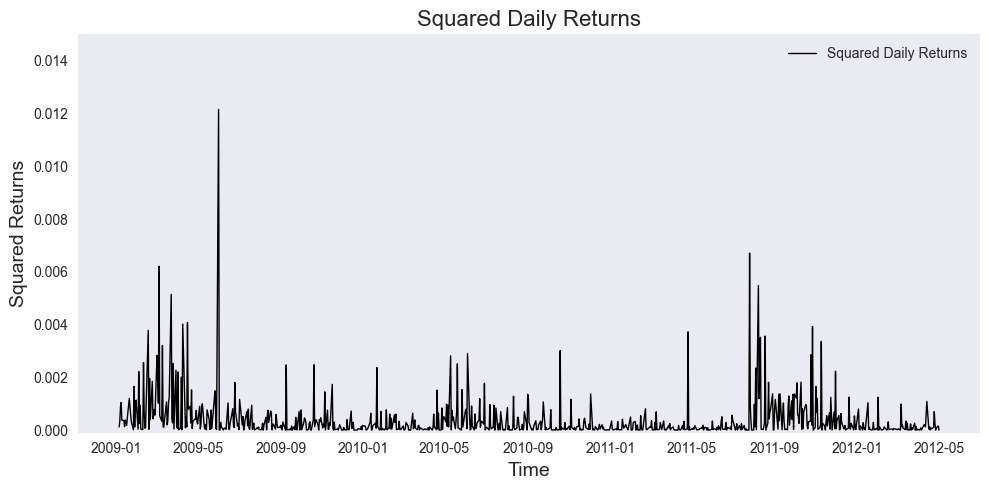

[8/10] Processing NOC
Kurtosis of NOC: 2.281727269870389


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


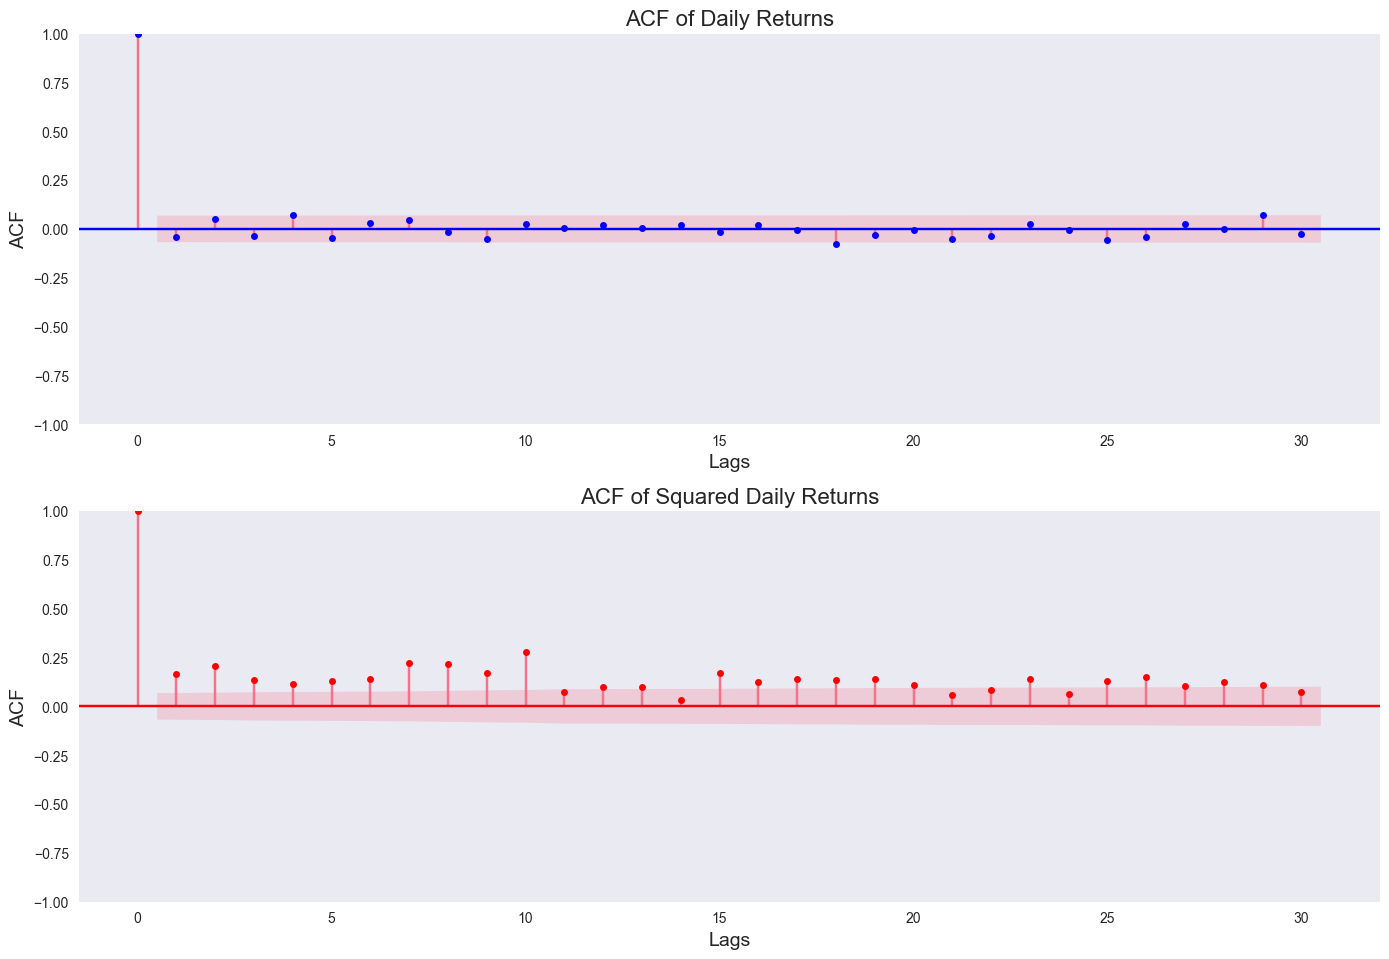

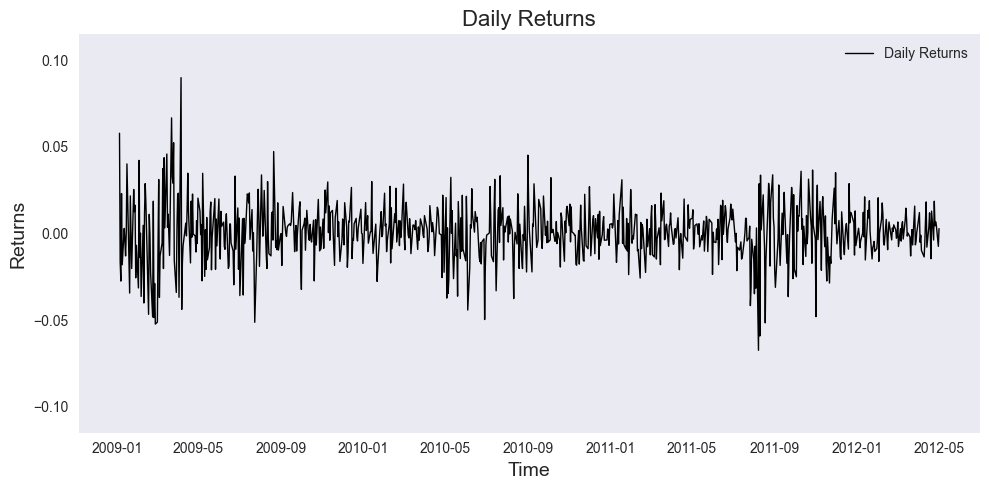

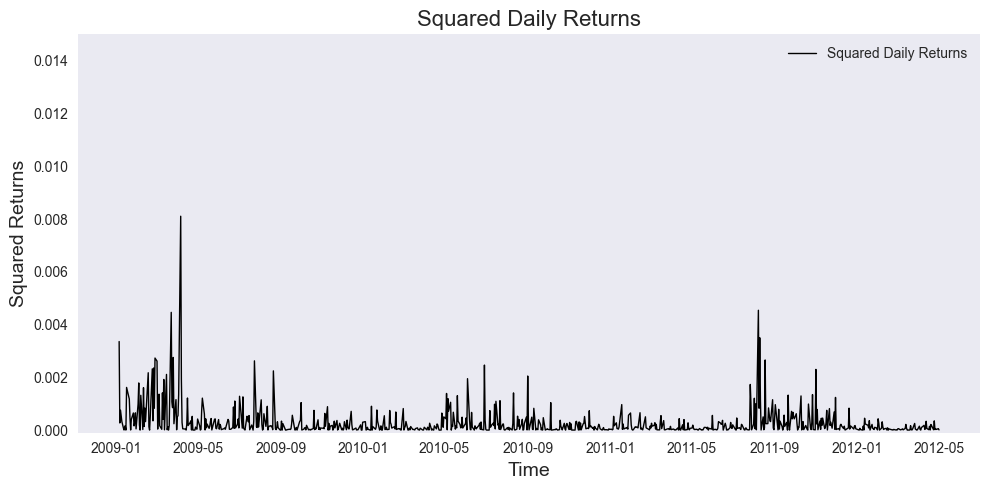

[9/10] Processing UPS
Kurtosis of UPS: 2.540940171064019


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


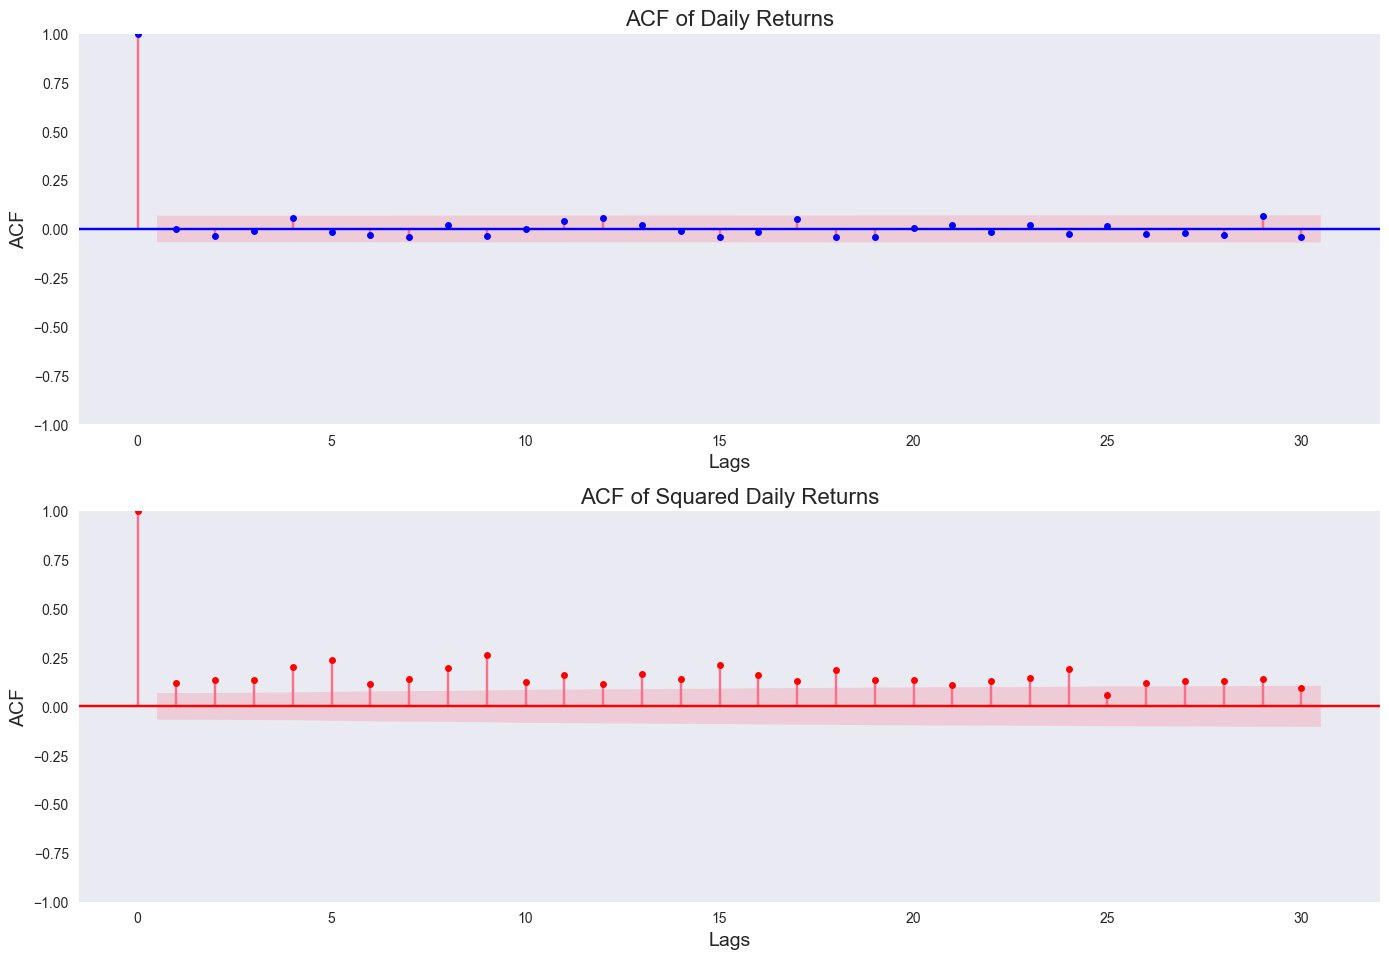

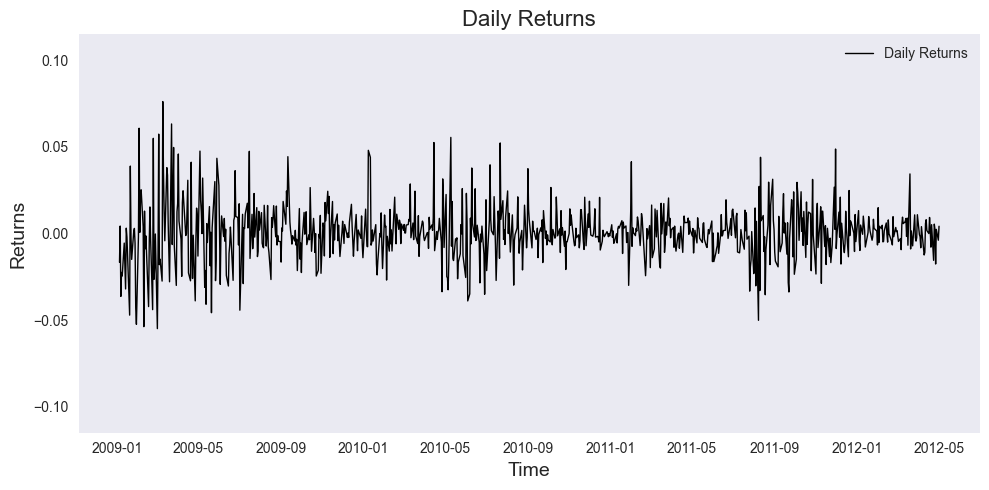

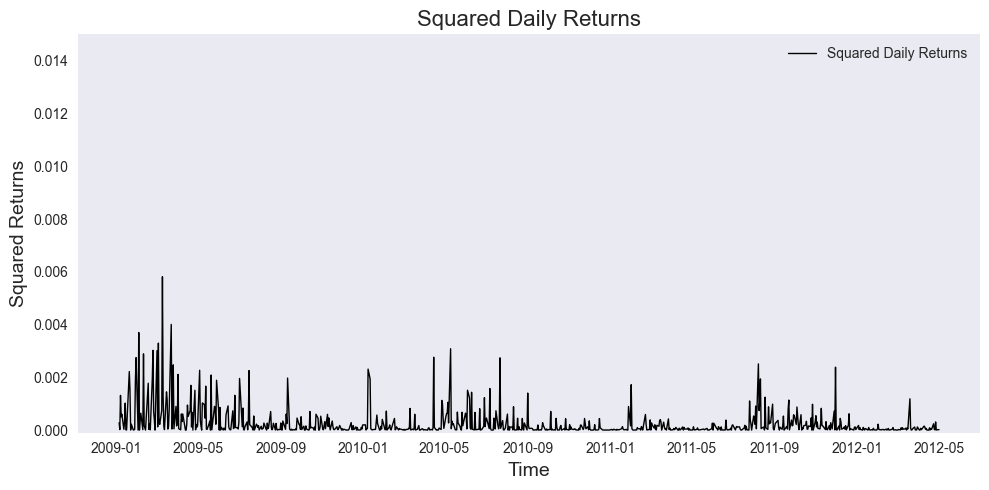

[10/10] Processing WM
Kurtosis of WM: 3.671543421050444


c:\Users\maxik\AppData\Desktop\GitHub\Probabilistic-Time-Series-Forecasting\src\data\data_preparation.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date,


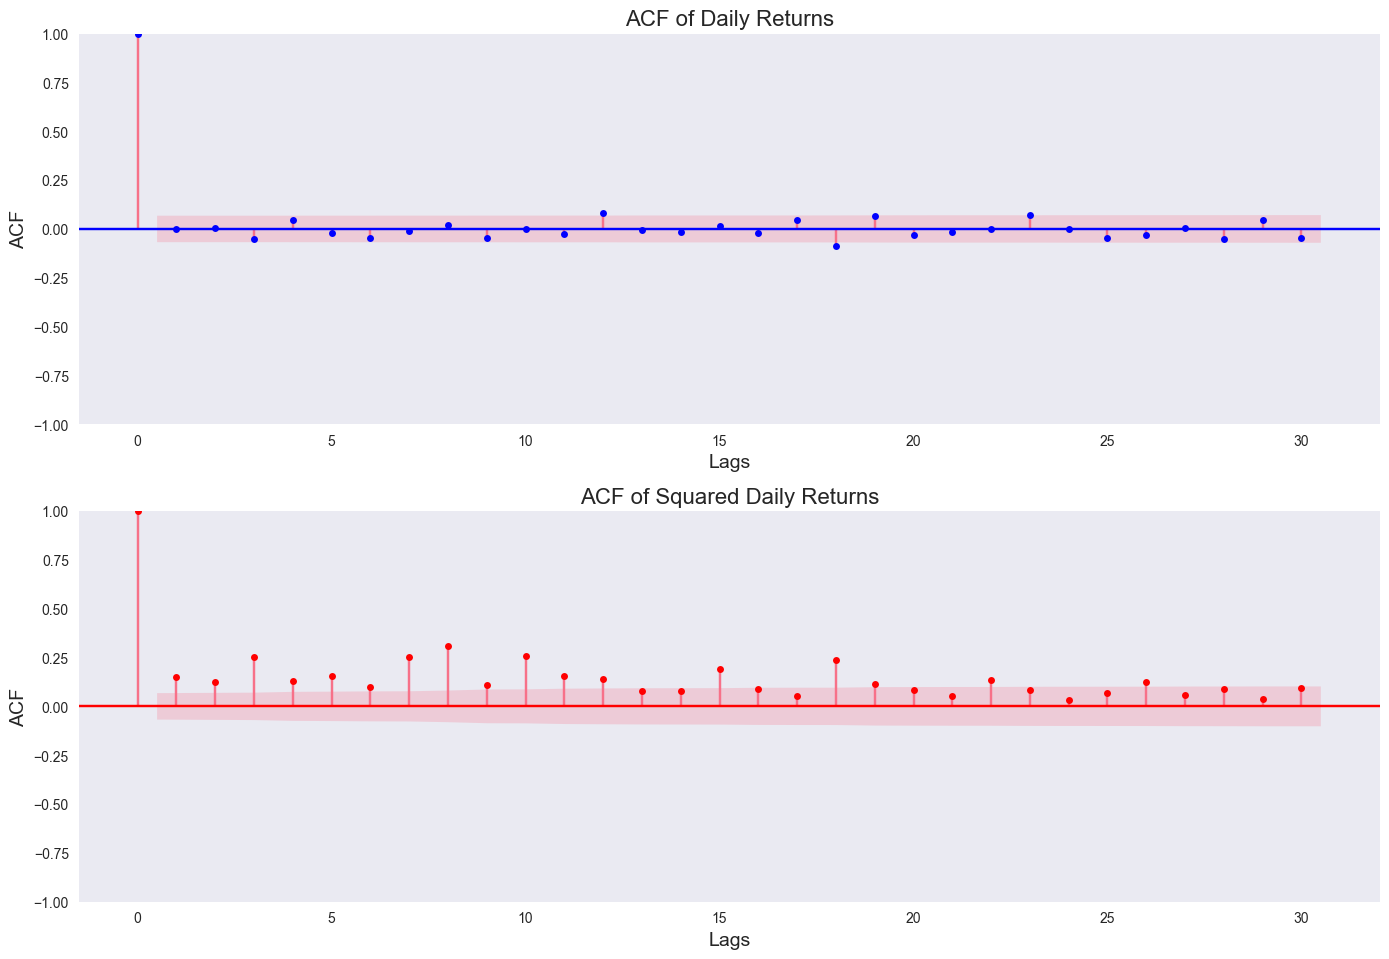

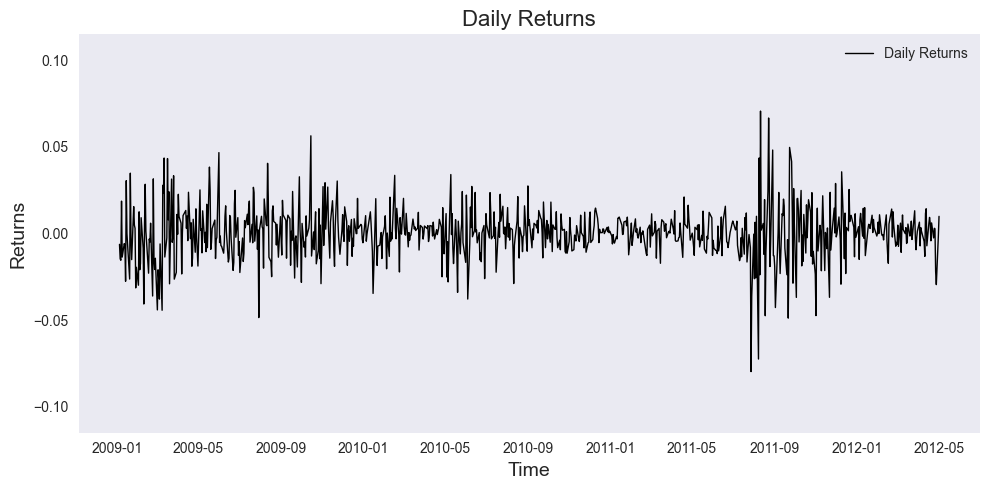

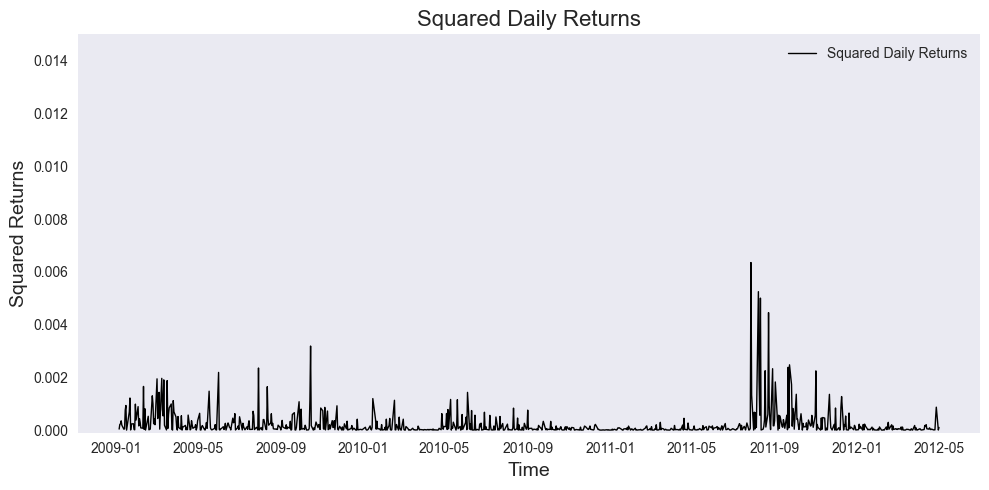

In [47]:
# Run comprehensive analysis across all stocks
print("Running comprehensive GARCH analysis across all industrial stocks...")

all_results_garch = []

for i, stock in enumerate(industrials_stocks, 1):
    print(f"[{i}/{len(industrials_stocks)}] Processing {stock}")

    # Create GARCH model
    GARCH_model = garch(stock, start_date=start_date, end_date=end_date)
    GARCH_model.read_data()
    
    # Run tests
    stationarity_result = GARCH_model.stationarity_test()
    acf_result = GARCH_model.acf_test()
    GARCH_model.kurtosis()
    
    # Combine results
    combined_result = pd.concat([stationarity_result, acf_result.drop(columns="ticker")], axis=1)
    all_results_garch.append(combined_result)
    
    # Generate plots
    GARCH_model.plot_acf()
    GARCH_model.stationarity()

## Analyzing GARCH Effects

The analysis of GARCH effects focuses on key characteristics of financial time series, such as:
- Volatility clustering: Periods of high volatility tend to be followed by high volatility, and low volatility by low volatility.
- Mean reversion: Volatility tends to revert to a long-term average over time.
- Asymmetric effects: Negative shocks may have a different impact on volatility compared to positive shocks.
- Persistence: Volatility shocks can have long-lasting effects.

Understanding these effects is essential for evaluating the suitability of GARCH models and interpreting their results.

In [48]:
# Combine all results into a single DataFrame
if all_results_garch:
    df_results_garch = pd.concat(all_results_garch, ignore_index=True)
    
    print("=== GARCH Analysis Results Summary ===")
    print(f"Total stocks analyzed: {len(df_results_garch)}")
    print("\nDetailed Results:")
    print(df_results_garch)
    
    # Save results to CSV for reference
    output_file = "../GARCH_analysis_results.csv"
    df_results_garch.to_csv(output_file, index=False)
    print(f"\nResults saved to: {output_file}")
    
else:
    print("No results to display. Please check for errors in the analysis above.")

=== GARCH Analysis Results Summary ===
Total stocks analyzed: 10

Detailed Results:
  ticker  adf_statistic       p_value  ljung_box_stat_daily  p_value_daily  \
0     BA      -4.893858  3.584728e-05             32.008978       0.367110   
1   CHRW      -5.003031  2.188864e-05             45.255889       0.036536   
2    DOV      -5.608145  1.220783e-06             35.838079       0.213426   
3    EFX      -5.053997  1.733357e-05             38.245383       0.143550   
4    EMR      -5.524239  1.848122e-06             24.255543       0.760342   
5   FAST      -5.992004  1.736705e-07             44.749293       0.040725   
6    ITW      -4.718622  7.762950e-05             45.955625       0.031378   
7    NOC      -5.394461  3.479133e-06             36.940940       0.178872   
8    UPS      -6.064591  1.190152e-07             27.996081       0.570644   
9     WM      -5.615786  1.175289e-06             42.220902       0.068514   

   ljung_box_stat_abs    p_value_abs  
0          250.274

## Statistical Summary

Let's create some summary statistics from our analysis.

In [49]:
if 'df_results_garch' in locals() and not df_results_garch.empty:
    print("=== Statistical Summary of GARCH Analysis ===")
    
    # Summary statistics for numerical columns
    numerical_cols = df_results_garch.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) > 0:
        print("\nSummary Statistics:")
        print(df_results_garch[numerical_cols].describe())
    
    # Count of categorical results if any
    categorical_cols = df_results_garch.select_dtypes(include=['object', 'bool']).columns
    if len(categorical_cols) > 0:
        print("\nCategorical Summary:")
        for col in categorical_cols:
            print(f"\n{col}:")
            print(df_results_garch[col].value_counts())

=== Statistical Summary of GARCH Analysis ===

Summary Statistics:
       adf_statistic       p_value  ljung_box_stat_daily  p_value_daily  \
count      10.000000  1.000000e+01             10.000000      10.000000   
mean       -5.386873  1.607150e-05             37.346671       0.241110   
std         0.458687  2.478000e-05              7.496496       0.250335   
min        -6.064591  1.190152e-07             24.255543       0.031378   
25%        -5.613876  1.186663e-06             32.966253       0.047672   
50%        -5.459350  2.663627e-06             37.593161       0.161211   
75%        -5.015772  2.074987e-05             44.117195       0.328689   
max        -4.718622  7.762950e-05             45.955625       0.760342   

       ljung_box_stat_abs    p_value_abs  
count           10.000000   1.000000e+01  
mean           386.041419   1.609807e-37  
std            132.489336   4.232394e-37  
min            250.274614  1.009054e-108  
25%            275.081973   1.086849e-72  